#### Importing neccesary libraries

In [209]:
import numpy as np
import pandas as pd

#### Importing DataSet

In [210]:
df = pd.read_csv('Fines paid  by doctors.csv')

In [211]:
df.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-


In [212]:
df2 = pd.read_excel(r'Emails sent (1).xlsx')

In [213]:
df2.head()

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health


#### First Question 
Standardise the mail_sent_date column values to YYYY-MM-DD standard date format

In [214]:
df2['mail_sent_date'] = pd.to_datetime(df2['mail_sent_date'])

In [215]:
df2['mail_sent_date'].head()

0   2009-05-22
1   2010-04-17
2   2012-01-26
3   2014-11-15
4   2014-07-17
Name: mail_sent_date, dtype: datetime64[ns]

#### Second Question
In which Year maximum number of emails were sent to doctors? 

In [216]:
df2['mail_sent_date'].dt.year.median()

2014.0

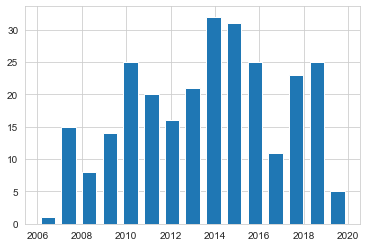

In [255]:
import matplotlib.pyplot as plt

df2['mail_sent_date'].dt.year.hist(bins=len(df2['mail_sent_date'].dt.year.unique()),rwidth=0.7)
plt.show()

#### Third Question
Write a query to get total fine paid per Office

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
name_last         272 non-null object
name_first        272 non-null object
name_middle       181 non-null object
mail_sent_date    272 non-null datetime64[ns]
office            272 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 10.7+ KB


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 8 columns):
org_indiv        10087 non-null object
first_name       9884 non-null object
last_name        10087 non-null object
city             10087 non-null object
state            10087 non-null object
category         10086 non-null object
 cash_fine       10087 non-null object
 online_fine     10087 non-null object
dtypes: object(8)
memory usage: 630.5+ KB


In [220]:
df2 = df2.rename(columns={"name_last": "last_name", "name_first": "first_name"})

In [221]:
df.columns = df.columns.str.strip()

In [222]:
df['cash_fine'] = df['cash_fine'].str.replace('$', '')
df['cash_fine'] = df['cash_fine'].str.replace(',', '')
df['cash_fine'] = df['cash_fine'].str.replace('-', '')

In [223]:
df['online_fine'] = df['online_fine'].str.replace(',', '').str.replace('$', '').str.replace('-', '')

In [224]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [225]:
df['online_fine'] = pd.to_numeric(df['online_fine'], errors='coerce')

In [226]:
df['cash_fine'] = pd.to_numeric(df['cash_fine'], errors='coerce')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 8 columns):
org_indiv      10087 non-null object
first_name     9884 non-null object
last_name      10087 non-null object
city           10087 non-null object
state          10087 non-null object
category       10086 non-null object
cash_fine      4663 non-null float64
online_fine    5423 non-null float64
dtypes: float64(2), object(6)
memory usage: 630.5+ KB


In [228]:
df_merge = pd.merge(df,df2,how='outer',on=['first_name','last_name'])

In [229]:
df_merge.groupby(by='category').sum()['cash_fine']

category
Business Related Travel                                                 0.0
Educational Items                                                       0.0
Expert-Led Forums                                                 9643970.0
Infosys Sponsored Research initiated before July 1, 2009         11137574.0
Infosys Sponsored Research initiated on or after July 1, 2009     2896911.0
Investigator-Initiated Research                                   1441855.0
Meals                                                                   0.0
Professional Advising                                             7572131.0
Name: cash_fine, dtype: float64

#### Fourth Question
Write a query to get the highest total fine and lowest total fine paid per state

In [230]:
df_merge = df.replace(np.nan, 0, regex=True)

In [231]:
df_merge['total_fine'] = df_merge['cash_fine'] + df_merge['online_fine'] 

In [232]:
print('Lowest Fine paid per State',df_merge.groupby(by='state').min()['total_fine'])
print('Highest Fine paid per State',df_merge.groupby(by='state').max()['total_fine'])

Lowest Fine paid per State state
AK    1750.0
AL      26.0
AR      26.0
AZ      26.0
CA      25.0
CO      31.0
CT      25.0
DC      25.0
DE      36.0
FL      25.0
GA      25.0
HI     102.0
IA      26.0
ID      33.0
IL      25.0
IN      26.0
KS      29.0
KY      26.0
LA      27.0
MA      29.0
MD      26.0
ME      42.0
MI      26.0
MN      25.0
MO      26.0
MS      34.0
MT      29.0
NC       0.0
ND      63.0
NE      25.0
NH      96.0
NJ      25.0
NM      60.0
NV      25.0
NY      25.0
OH      25.0
OK      37.0
OR      27.0
PA      25.0
PR      26.0
RI      28.0
SC      26.0
SD      66.0
TN      27.0
TX      25.0
UT      27.0
VA      36.0
VT      40.0
WA      31.0
WI      25.0
WV      28.0
WY      27.0
Name: total_fine, dtype: float64
Highest Fine paid per State state
AK       1750.0
AL     232991.0
AR      77670.0
AZ     151642.0
CA     323122.0
CO     282565.0
CT     132853.0
DC      62000.0
DE      19750.0
FL    1185466.0
GA     101734.0
HI       6500.0
IA     123375.0
ID       7000.0


#### Fifth Question
Write a query to get the least 2 states that had to pay minimum 'online' fine 

In [239]:
df.groupby(by='state').min()['online_fine'].sort_values()

state
NJ     25.0
MN     25.0
NE     25.0
IL     25.0
OH     25.0
TX     25.0
FL     25.0
GA     25.0
DC     25.0
CT     25.0
WI     25.0
CA     25.0
NC     25.0
NV     25.0
NY     25.0
PA     25.0
MD     26.0
MO     26.0
MI     26.0
AL     26.0
KY     26.0
SC     26.0
IA     26.0
AZ     26.0
AR     26.0
PR     26.0
IN     26.0
OR     27.0
TN     27.0
UT     27.0
WY     27.0
LA     27.0
RI     28.0
WV     28.0
KS     29.0
MA     29.0
MT     29.0
WA     31.0
CO     31.0
ID     33.0
MS     34.0
DE     36.0
VA     36.0
OK     37.0
VT     40.0
ME     42.0
NM     60.0
ND     63.0
SD     66.0
NH     96.0
HI    102.0
AK      NaN
Name: online_fine, dtype: float64

In [240]:
## In case we consider empty value as zero then the fine will be
df_merge.groupby(by='state').min()['online_fine'].sort_values()

state
AK    0.0
ND    0.0
NE    0.0
NH    0.0
NJ    0.0
NM    0.0
NV    0.0
NY    0.0
OH    0.0
OK    0.0
OR    0.0
NC    0.0
PA    0.0
RI    0.0
SC    0.0
SD    0.0
TN    0.0
TX    0.0
UT    0.0
VA    0.0
VT    0.0
WA    0.0
WI    0.0
PR    0.0
MT    0.0
MS    0.0
MO    0.0
AL    0.0
AR    0.0
AZ    0.0
CA    0.0
CO    0.0
CT    0.0
DC    0.0
DE    0.0
FL    0.0
GA    0.0
HI    0.0
IA    0.0
ID    0.0
IL    0.0
IN    0.0
KS    0.0
KY    0.0
LA    0.0
MA    0.0
MD    0.0
ME    0.0
MI    0.0
MN    0.0
WV    0.0
WY    0.0
Name: online_fine, dtype: float64

#### Question 6
Write a SQL query to find the number of doctors that contributed to the state having highest 'cash' fine

In [243]:
df_merge[df_merge['cash_fine'] == df_merge['cash_fine'].max()]

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,total_fine
6160,MRA CLINICAL RESEARCH,PATRICIA,PARDO-LANG,MIAMI,FL,Infosys Sponsored Research initiated on or aft...,1185466.0,0.0,1185466.0


if df_merge is table and all this data frame columns are columns of table. Then SQL can be formed like

select count(first_name) from df_merge where cash_fine = (select max(cash_fine) from df_merge)

#### Question 7
Get the top 5 average fine paid per state and category


In [249]:
df_merge.groupby(by='state').mean()['total_fine'].sort_values(ascending=False)[:5]

state
MA    6813.787645
NH    6384.037037
CO    6184.040541
NC    6079.464752
OR    5236.896552
Name: total_fine, dtype: float64

In [250]:
df_merge.groupby(by='category').mean()['total_fine'].sort_values(ascending=False)[:5]

category
Infosys Sponsored Research initiated on or after July 1, 2009    65838.886364
Infosys Sponsored Research initiated before July 1, 2009         54864.896552
Investigator-Initiated Research                                  42407.500000
Professional Advising                                             4963.692459
Expert-Led Forums                                                 3375.558278
Name: total_fine, dtype: float64

#### Basic EDA

In [256]:
df_merge.head(4)

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,total_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0


In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [270]:
df_merge2 = df_merge.groupby(by='category').sum()

In [272]:
df_merge2.reset_index(drop=False, inplace=True)

In [275]:
df_merge2 = df_merge2[1:]

<BarContainer object of 8 artists>

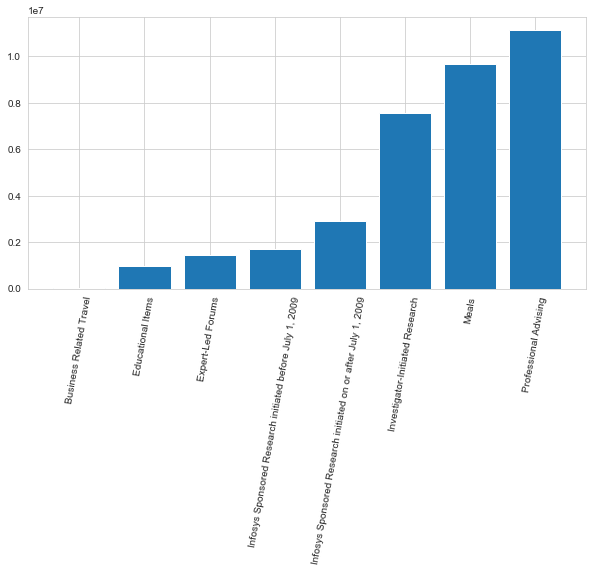

In [285]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
plt.bar(df_merge2['category'],df_merge2['total_fine'].sort_values())

##### Highest Fine we are recieving from Professional Advising while lowest from Business Related travel which is almost dimished

In [294]:
df_merge3 = df_merge.groupby(by='state').sum()
df_merge3.reset_index(drop=False, inplace=True)

In [295]:
df_merge3

,state,cash_fine,online_fine,total_fine
0,AK,1750.0,0.0,1750.0
1,AL,641928.0,39771.0,681699.0
2,AR,153131.0,7801.0,160932.0
3,AZ,613168.0,28683.0,641851.0
4,CA,4331517.0,406290.0,4737807.0
5,CO,884454.0,30784.0,915238.0
6,CT,602323.0,29959.0,632282.0
7,DC,211669.0,38872.0,250541.0
8,DE,49547.0,4440.0,53987.0
9,FL,2400881.0,163166.0,2564047.0


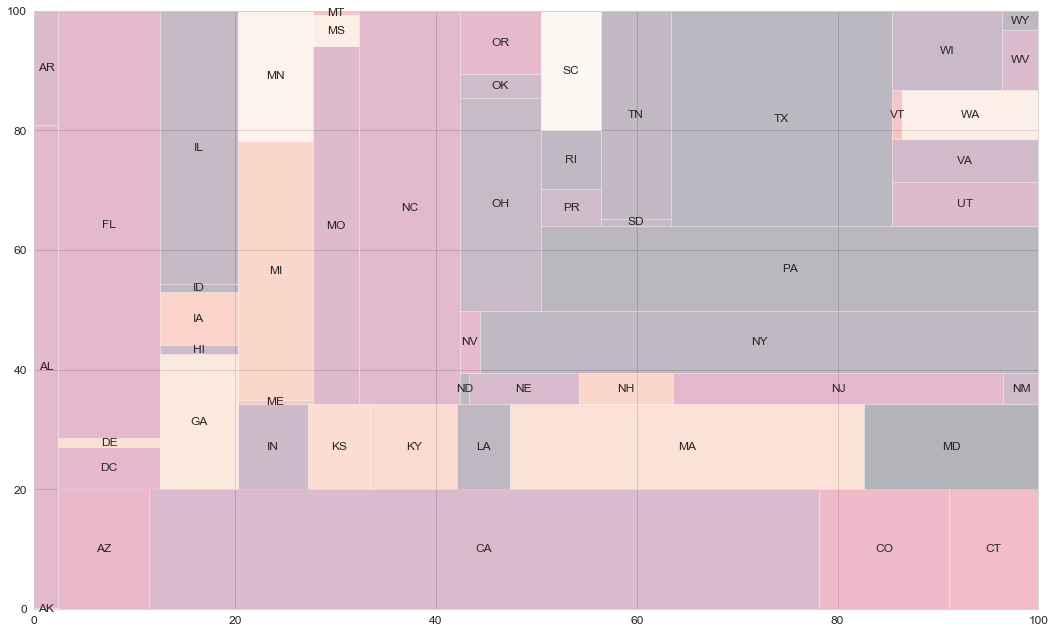

In [297]:
import squarify
plt.figure(figsize=(18,11))
plt.rc('font', size=12)
squarify.plot(sizes=df_merge3['total_fine'], label=df_merge3['state'], alpha=.3)
plt.show()tg

##### Major penalty recieving states we can see at the glimpse